# Market Basket Analysis with Apriori Algorithm

In this program I will representage market basket analysis with Apriori, I use efficient_apriori package
<br>
Data in this program is about customer who buy some products in online shop <br>
Market Basket Analysis (MBA) is the process of discovering frequent item sets in large transactional database. <br>
with MBA you can get insight, ex : you can know the product isn't interested, so you can make promotion of that product.

### Note :
To understand apriori algorithm, terminologies you should know: support, confidence, lift and conviction. <br><br>
Support is an indication of how frequently the itemset appears in the dataset. <br>
Confidence is an indication of how often the rule has been found to be true. <br>
Lift is the ratio of the observed support to that expected if X and Y were independent. <br>
Conviction is the ratio of the expected frequency that X occurs without Y.

## Import Package

In [70]:
import pandas as pd
from efficient_apriori import apriori
from apyori import apriori as ap
import numpy as np
import matplotlib.pyplot as plt

## Load Data

In [77]:
data = pd.read_csv("DATA.csv")

In [73]:
data

,Timestamp,Name,Item 1,Item 2,Item 3
0,2019/09/17 8:58:22 AM GMT+7,Firdaus Adi Nugroho,HP,Racket,Watch
1,2019/09/17 8:58:24 AM GMT+7,faizah,HP,Camera,Watch
2,2019/09/17 8:58:30 AM GMT+7,andrem,Watch,Camera,Music Pad
3,2019/09/17 8:58:30 AM GMT+7,laili,Camera,Watch,Mouse
4,2019/09/17 8:58:33 AM GMT+7,Tara,HP,Watch,Music Pad
5,2019/09/17 8:58:36 AM GMT+7,Devita,Watch,Racket,Camera
6,2019/09/17 8:58:36 AM GMT+7,febi,HP,Camera,Watch
7,2019/09/17 8:58:36 AM GMT+7,rima,Watch,Camera,Music Pad
8,2019/09/17 8:58:43 AM GMT+7,FdN,Racket,Soap,Guitar
9,2019/09/17 8:58:44 AM GMT+7,tunggal,Racket,Camera,Guitar


## Visualization of Data
from this bar plot can be known which items have the highest number of purchases

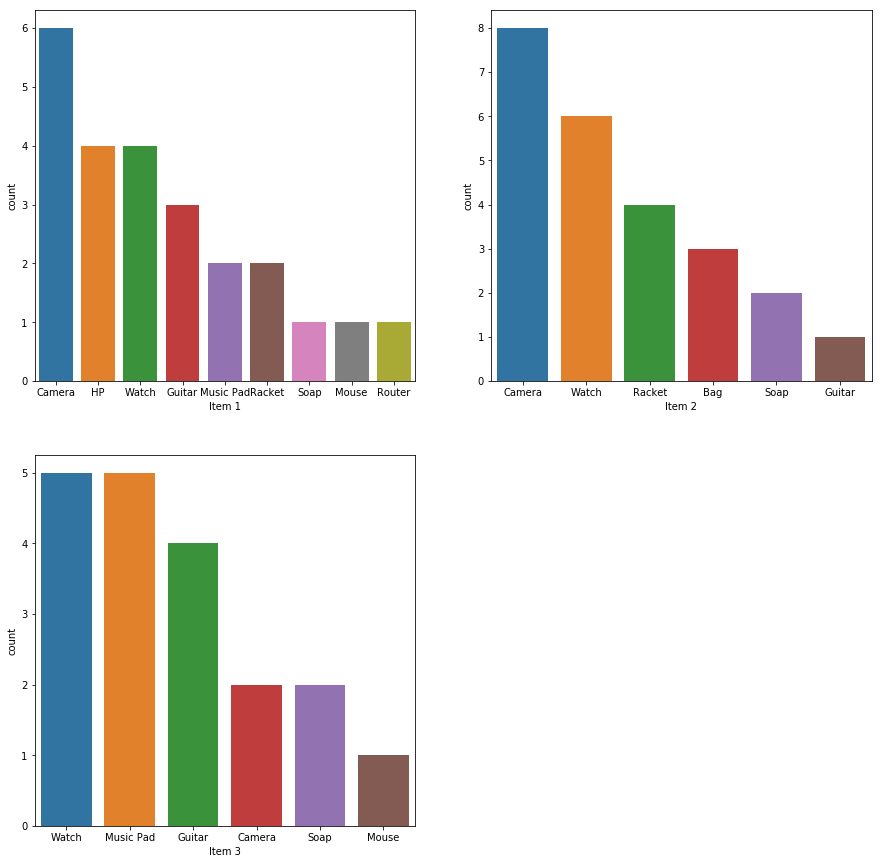

In [119]:
import seaborn as sns
f=plt.figure(figsize=(15,15))
f.add_subplot(2,2,1)
sns.countplot(data['Item 1'],order=data['Item 1'].value_counts().index)
f.add_subplot(2,2,2)
sns.countplot(data['Item 2'],order=data['Item 2'].value_counts().index)
f.add_subplot(2,2,3)
sns.countplot(data['Item 3'],order=data['Item 3'].value_counts().index)

## Make column "Name" as index and Drop unuse columns

In [78]:
data.index = data['Name']

In [79]:
data = data.drop(['Timestamp','Name'],axis =1)

In [80]:
data

,Item 1,Item 2,Item 3
Name,,,
Firdaus Adi Nugroho,HP,Racket,Watch
faizah,HP,Camera,Watch
andrem,Watch,Camera,Music Pad
laili,Camera,Watch,Mouse
Tara,HP,Watch,Music Pad
Devita,Watch,Racket,Camera
febi,HP,Camera,Watch
rima,Watch,Camera,Music Pad
FdN,Racket,Soap,Guitar


## Run with Apriori

In [37]:
# Initialize transaction variabel with list of items
transactions = []
for i in range(0,23):
    transactions.append([str(data_final.values[i,j])for j in range(0,3)])
# set data, min support and min confidence
itemsets, rules = apriori(transactions, min_support=0.1,  min_confidence=0.2)
print(rules)

[{Guitar} -> {Camera}, {Camera} -> {Guitar}, {Music Pad} -> {Camera}, {Camera} -> {Music Pad}, {Racket} -> {Camera}, {Camera} -> {Racket}, {Watch} -> {Camera}, {Camera} -> {Watch}, {nan} -> {Camera}, {Camera} -> {nan}, {Racket} -> {Guitar}, {Guitar} -> {Racket}, {Watch} -> {HP}, {HP} -> {Watch}, {Watch} -> {Music Pad}, {Music Pad} -> {Watch}, {Watch} -> {Racket}, {Racket} -> {Watch}, {nan} -> {Watch}, {Watch} -> {nan}, {Music Pad, Watch} -> {Camera}, {Camera, Watch} -> {Music Pad}, {Camera, Music Pad} -> {Watch}, {Watch} -> {Camera, Music Pad}, {Music Pad} -> {Camera, Watch}, {Camera} -> {Music Pad, Watch}]


## Association Rules

### Print the rule with 1 items on the left and 1 item on the right, sorted by lift

In [123]:
rules_rhs = filter(lambda rule: len(rule.lhs) == 1 and len(rule.rhs) == 1, rules)
for rule in sorted(rules_rhs, key=lambda rule: rule.lift):
  print(rule) # Print the rule with confidence, support, lift, conviction

{Racket} -> {Camera} (conf: 0.500, supp: 0.130, lift: 0.767, conv: 0.696)
{Camera} -> {Racket} (conf: 0.200, supp: 0.130, lift: 0.767, conv: 0.924)
{Watch} -> {Racket} (conf: 0.200, supp: 0.130, lift: 0.767, conv: 0.924)
{Racket} -> {Watch} (conf: 0.500, supp: 0.130, lift: 0.767, conv: 0.696)
{nan} -> {Camera} (conf: 0.600, supp: 0.130, lift: 0.920, conv: 0.870)
{Camera} -> {nan} (conf: 0.200, supp: 0.130, lift: 0.920, conv: 0.978)
{nan} -> {Watch} (conf: 0.600, supp: 0.130, lift: 0.920, conv: 0.870)
{Watch} -> {nan} (conf: 0.200, supp: 0.130, lift: 0.920, conv: 0.978)
{Guitar} -> {Camera} (conf: 0.625, supp: 0.217, lift: 0.958, conv: 0.928)
{Camera} -> {Guitar} (conf: 0.333, supp: 0.217, lift: 0.958, conv: 0.978)
{Watch} -> {Camera} (conf: 0.667, supp: 0.435, lift: 1.022, conv: 1.043)
{Camera} -> {Watch} (conf: 0.667, supp: 0.435, lift: 1.022, conv: 1.043)
{Music Pad} -> {Camera} (conf: 0.714, supp: 0.217, lift: 1.095, conv: 1.217)
{Camera} -> {Music Pad} (conf: 0.333, supp: 0.217, li

### Print the rule with 2 items on the left and 1 item on the right, sorted by lift

In [92]:
rules_rhs = filter(lambda rule: len(rule.lhs) == 2 and len(rule.rhs) == 1, rules)
for rule in sorted(rules_rhs, key=lambda rule: rule.lift):
  print(rule) # Print the rule with confidence, support, lift, conviction

{Music Pad, Watch} -> {Camera} (conf: 0.600, supp: 0.130, lift: 0.920, conv: 0.870)
{Camera, Music Pad} -> {Watch} (conf: 0.600, supp: 0.130, lift: 0.920, conv: 0.870)
{Camera, Watch} -> {Music Pad} (conf: 0.300, supp: 0.130, lift: 0.986, conv: 0.994)


### Print the rule with 1 items on the left and 2 item on the right, sorted by lift

In [94]:
rules_rhs = filter(lambda rule: len(rule.lhs) == 1 and len(rule.rhs) == 2, rules)
for rule in sorted(rules_rhs, key=lambda rule: rule.lift):
  print(rule) # Print the rule with confidence, support, lift, conviction

{Watch} -> {Camera, Music Pad} (conf: 0.200, supp: 0.130, lift: 0.920, conv: 0.978)
{Camera} -> {Music Pad, Watch} (conf: 0.200, supp: 0.130, lift: 0.920, conv: 0.978)
{Music Pad} -> {Camera, Watch} (conf: 0.429, supp: 0.130, lift: 0.986, conv: 0.989)


## Frequent of n-term set

In [39]:
ts = apriori(transactions, min_support=0.1,  min_confidence=0.2)
ts

({1: {('Bag',): 3,
   ('Camera',): 15,
   ('Guitar',): 8,
   ('HP',): 4,
   ('Music Pad',): 7,
   ('Racket',): 6,
   ('Soap',): 4,
   ('Watch',): 15,
   ('nan',): 5},
  2: {('Camera', 'Guitar'): 5,
   ('Camera', 'Music Pad'): 5,
   ('Camera', 'Racket'): 3,
   ('Camera', 'Watch'): 10,
   ('Camera', 'nan'): 3,
   ('Guitar', 'Racket'): 3,
   ('HP', 'Watch'): 4,
   ('Music Pad', 'Watch'): 5,
   ('Racket', 'Watch'): 3,
   ('Watch', 'nan'): 3},
  3: {('Camera', 'Music Pad', 'Watch'): 3}},
 [{Guitar} -> {Camera},
  {Camera} -> {Guitar},
  {Music Pad} -> {Camera},
  {Camera} -> {Music Pad},
  {Racket} -> {Camera},
  {Camera} -> {Racket},
  {Watch} -> {Camera},
  {Camera} -> {Watch},
  {nan} -> {Camera},
  {Camera} -> {nan},
  {Racket} -> {Guitar},
  {Guitar} -> {Racket},
  {Watch} -> {HP},
  {HP} -> {Watch},
  {Watch} -> {Music Pad},
  {Music Pad} -> {Watch},
  {Watch} -> {Racket},
  {Racket} -> {Watch},
  {nan} -> {Watch},
  {Watch} -> {nan},
  {Music Pad, Watch} -> {Camera},
  {Camera, Watch

# Conclusion
Association rule mining algorithms such as Apriori are very useful for finding simple associations between our data items. They are easy to understand, easy to implement and it can be used for large dataset and easy to be parallelized.